# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Jum'at, 12 Juli 2024
3. Tempat di Laptop
4. Data menggunakan Dataset yang dari Roboflow 
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [ ]:
# pip install tensorflow

In [ ]:
# pip install keras

In [ ]:
# pip install opencv-python

In [ ]:
# pip install imutils

In [ ]:
# pip install matplotlib

In [ ]:
# pip install seaborn

In [ ]:
# pip install scikit-learn

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [2]:
# import os
# import pandas as pd
# import cv2

# def convert_to_png(image_path, output_path):
#     # Read the image using OpenCV
#     image = cv2.imread(image_path)
#     # Create the output directory if it doesn't exist
#     os.makedirs(os.path.dirname(output_path), exist_ok=True)
#     # Save the image as PNG
#     cv2.imwrite(output_path, image)

# def get_last_n_parts(path, n):
#     return os.path.join(*path.split(os.sep)[-n:])

# def create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR):
#     # List to store image file paths and their corresponding labels and dimensions
#     data = []

#     # Traverse the dataset directory
#     for root, dirs, files in os.walk(DATASET_PATH):
#         for file in files:
#             if file.endswith(('.jpg', '.jpeg', '.png')):
#                 # Get the class label from the subdirectory name
#                 label = os.path.basename(root)
#                 # Get the full file path
#                 file_path = os.path.join(root, file)
                
#                 # Create a new file path for the PNG image
#                 relative_path = os.path.relpath(file_path, DATASET_PATH)
#                 png_file_path = os.path.join(OUTPUT_IMAGE_DIR, os.path.splitext(relative_path)[0] + '.png')
                
#                 # Convert the image to PNG
#                 convert_to_png(file_path, png_file_path)
                
#                 # Get image dimensions
#                 img = cv2.imread(file_path)
#                 height, width, _ = img.shape
                
#                 # Get only the last 3 parts of the path for CSV
#                 csv_path = get_last_n_parts(png_file_path, 2)
                
#                 # Append to the data list including dimensions
#                 data.append([csv_path, width, height, label])
    
#     # Create a DataFrame from the data list
#     df = pd.DataFrame(data, columns=['file_path', 'width', 'height', 'label'])
    
#     # Save the DataFrame to a CSV file
#     df.to_csv(OUTPUT_CSV, index=False)
#     print(f'Labels CSV file created at: {OUTPUT_CSV}')

# # Define the paths for the two datasets and their respective output directories
# DATASET_PATH = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\CustomData\\v.6_all_data_custom\\"
# OUTPUT_CSV = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\labels.csv"
# OUTPUT_IMAGE_DIR = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\"

# # Process the first dataset
# create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR)

In [3]:
import pandas as pd

# Path ke dua file CSV yang berbeda
path_main = "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\"
file = path_main + "augmented_labels.csv"
df = pd.read_csv(file)
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,ga_original_ga16-meki-png_0f30e507-35d9-440c-b...,640,640,Ga,0,0,622,498
1,ga_original_ga16-meki-png_0f30e507-35d9-440c-b...,640,640,Ga,0,0,622,498
2,ga_original_ga16-meki-png_0f30e507-35d9-440c-b...,640,640,Ga,0,0,622,498
3,ga_original_ga16-meki-png_0f30e507-35d9-440c-b...,640,640,Ga,0,0,622,498
4,ga_original_ga16-meki-png_0f30e507-35d9-440c-b...,640,640,Ga,0,0,622,498


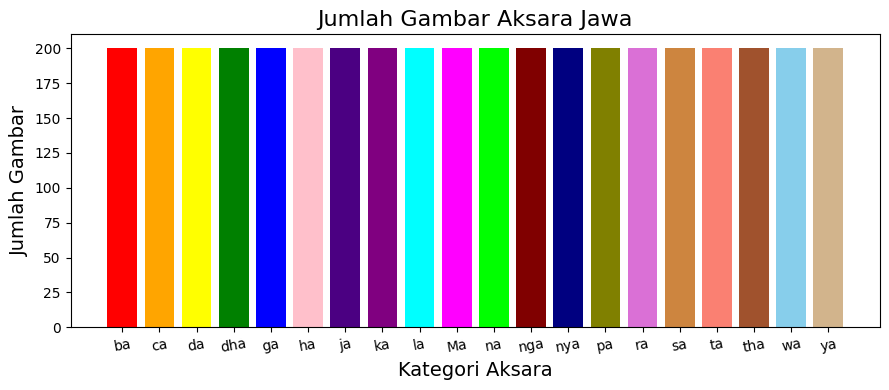

In [4]:
import matplotlib.pyplot as plt
import os

# Define function to count files in each directory
def count_files(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    return num_files

# Define paths for two sources
source_paths = [
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\ba",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\ca",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\da",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\dha",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\ga",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\ha",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\ja",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\ka",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\la",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\ma",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\na",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\nga",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\nya",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\pa",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\ra",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\sa",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\ta",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\tha",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\wa",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.8\\ya"
]

# Count files for each path
file_counts = [count_files(path) for path in source_paths]

# Define the input path aksara
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (112, 112)
INPUT_SHAPE = (112, 112, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

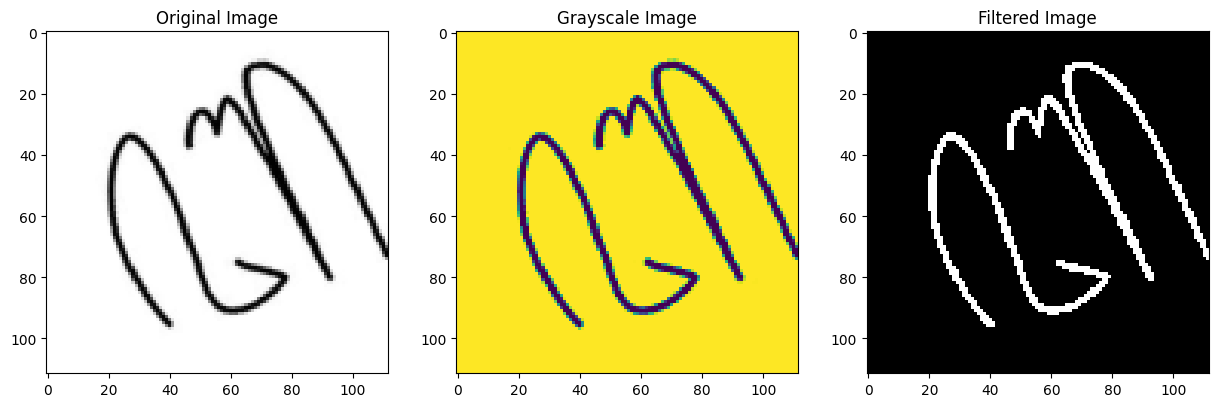

In [6]:
# Select one image to display
index_to_display = 100

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')
plt.axis('on')

plt.show()

In [7]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 112, 112, 1).astype("float32") / 255  # Reshape dan normalisasi
# X_filtered_reshaped = X_filtered.reshape(-1, 112, 112, 1)

print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (4000, 112, 112, 1)


In [8]:
from sklearn.model_selection import train_test_split

# Tahap pertama: Membagi data menjadi data pelatihan (70%) dan data sementara (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_filtered_reshaped, y_label, test_size=0.3, random_state=37)

# Tahap kedua: Membagi data sementara menjadi data validasi (20%) dan data pengujian (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=37)

# Verifikasi ukuran data
print("Ukuran data pelatihan:", X_train.shape, y_train.shape)
print("Ukuran data validasi:", X_val.shape, y_val.shape)
print("Ukuran data pengujian:", X_test.shape, y_test.shape)

Ukuran data pelatihan: (2800, 112, 112, 1) (2800, 20)
Ukuran data validasi: (800, 112, 112, 1) (800, 20)
Ukuran data pengujian: (400, 112, 112, 1) (400, 20)


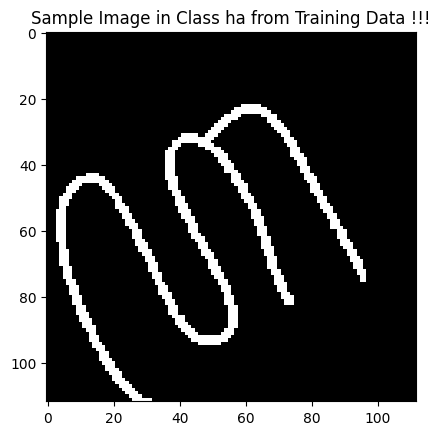

In [9]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

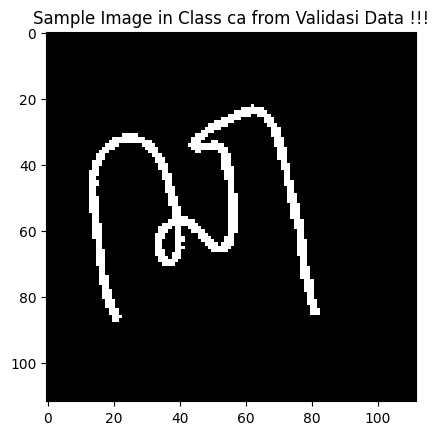

In [10]:
# Menampilkan salah satu gambar dari data validasi
plt.imshow(X_val[77], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_val[77])]))
plt.axis('on')
plt.show()

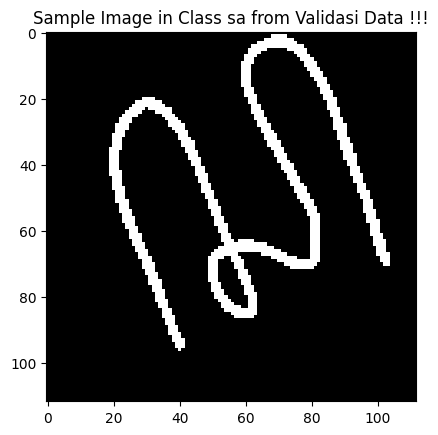

In [11]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[55], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_test[55])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1 - Dropout(0.1, 0.2, 0.5) + learning_rate=0.0001 + weight_decay=1e-4 + clipnorm=0.5

In [90]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization(momentum=0.01))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten
model.add(Flatten())
# Dense layers 1
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(momentum=0.1))
model.add(Dropout(0.2))
# Dense layers 2
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization(momentum=0.1))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(20, activation='softmax'))

In [91]:
# Kompilasi Model
# optimizer = SGD(learning_rate=0.0001, weight_decay=1e-4, clipnorm=0.1)
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_403 (Conv2D)             │ (None, 112, 112, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_465         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_404 (Conv2D)             │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_466         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_155               │ (None, 56, 56, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_217 (Dropout)           │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_405 (Conv2D)             │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_467         │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_406 (Conv2D)             │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_468         │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_156               │ (None, 28, 28, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_218 (Dropout)           │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_407 (Conv2D)             │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_469         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_408 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_470         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_409 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_471         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_157               │ (None, 14, 14, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_219 (Dropout)           │ (None, 14, 14, 128)    │             

 Total params: 10,319,988 (39.37 MB)

 Trainable params: 10,312,692 (39.34 MB)

 Non-trainable params: 7,296 (28.50 KB)

In [92]:
# Train the model
history_v1 = model.fit(X_train, 
                       y_train, 
                       epochs=30, 
                       batch_size=64, 
                       validation_data=(X_val, y_val))

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.0550 - loss: 3.9566 - val_accuracy: 0.0550 - val_loss: 4.0016
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.0770 - loss: 3.6332 - val_accuracy: 0.0725 - val_loss: 3.9106
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.1062 - loss: 3.4357 - val_accuracy: 0.0688 - val_loss: 3.7052
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.1337 - loss: 3.2874 - val_accuracy: 0.0625 - val_loss: 4.2318
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.1578 - loss: 3.0685 - val_accuracy: 0.0637 - val_loss: 4.4613
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.2098 - loss: 2.8662 - val_accuracy: 0.0662 - val_loss: 4.6151
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.2336 - loss: 2.6900 - val_accuracy: 0.0613 - val_loss: 6.0467
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.2533 - loss: 2.5237 - val_accuracy: 0.0650 - val_loss:

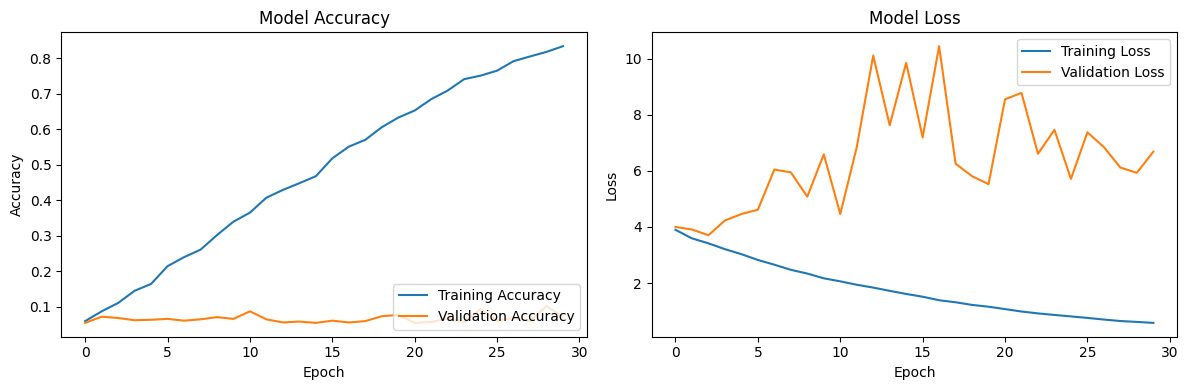

In [93]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v1.history.get('accuracy', [])
test_acc = history_v1.history.get('val_accuracy', [])
loss = history_v1.history.get('loss', [])
test_loss = history_v1.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [94]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.0311 - loss: 6.8044
Loss: 6.727344512939453
Accuracy: 0.042500000447034836


In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step
Precision: 0.05448142414860681
Recall: 0.0425
F1 Score: 0.008548538482166801
Log Loss: 3.0041194998179974
Accuracy: 0.0425


c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

          ba       0.00      0.00      0.00        24
          ca       0.00      0.00      0.00        21
          da       0.00      0.00      0.00        14
         dha       0.00      0.00      0.00        18
          ga       0.00      0.00      0.00        24
          ha       0.00      0.00      0.00        25
          ja       0.00      0.00      0.00        14
          ka       0.00      0.00      0.00        24
          la       1.00      0.05      0.09        21
          Ma       0.00      0.00      0.00        22
          na       0.00      0.00      0.00        18
         nga       0.00      0.00      0.00        22
         nya       0.00      0.00      0.00        18
          pa       0.00      0.00      0.00        13
          ra       0.05      1.00      0.09        16
          sa       0.00      0.00      0.00        24
          ta       0.00      0.00      0.00        17
         tha       0.00    

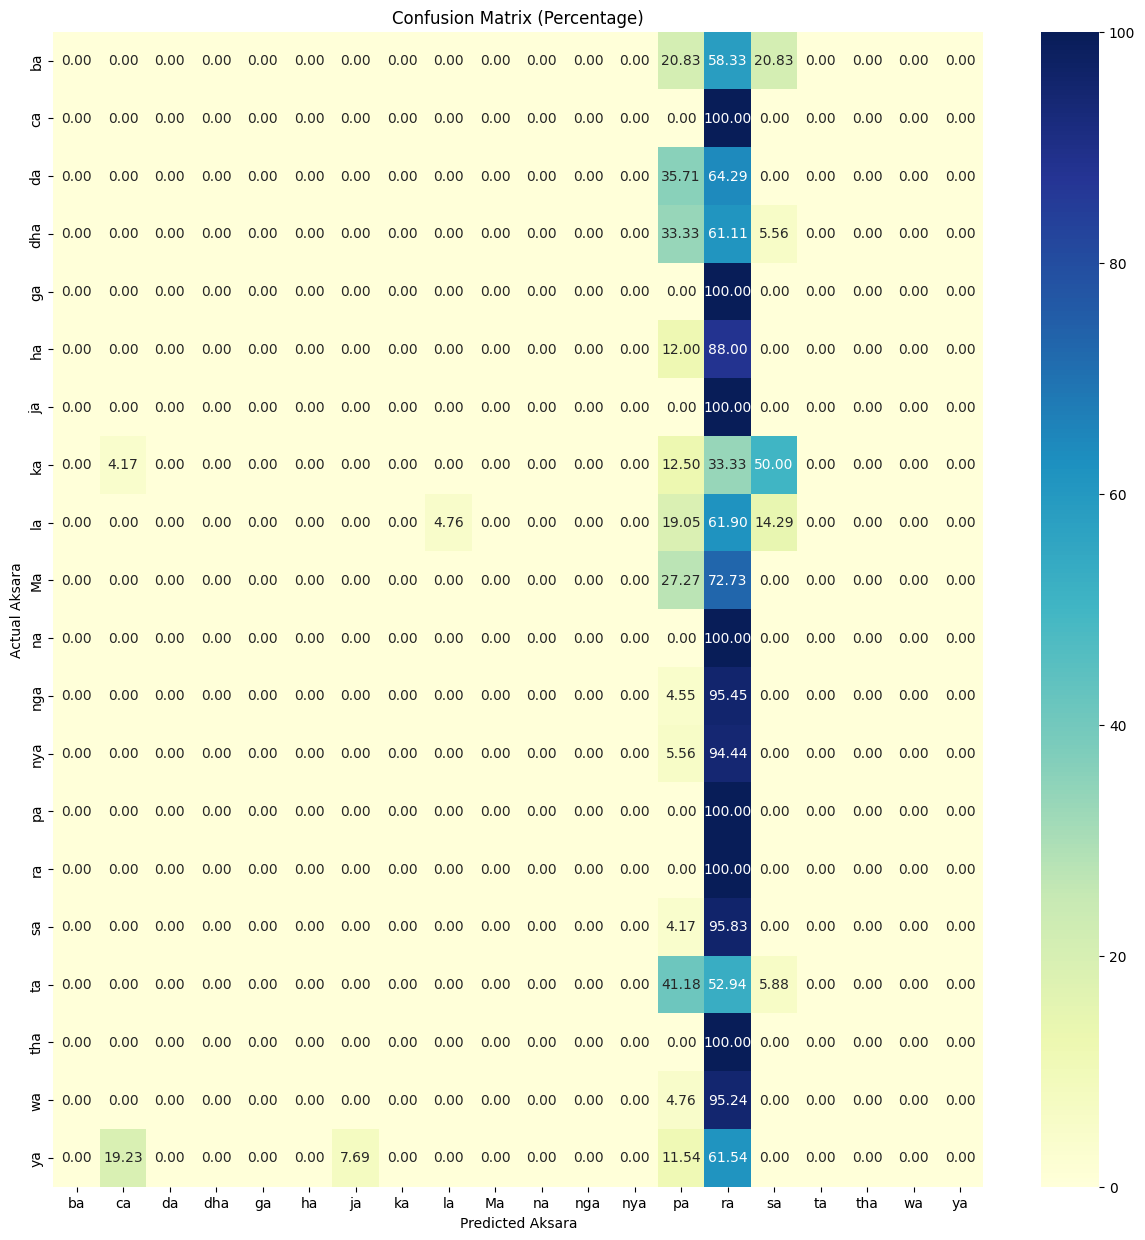

In [96]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 2 - Dropout(0.2) + learning_rate=0.001 + weight_decay=1e-4

In [42]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten
model.add(Flatten())
# Dense layers 1
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(Dropout(0.2))
# Dense layers 2
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(momentum=0.1, epsilon=0.1))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(20, activation='softmax'))

In [43]:
# Kompilasi Model
# optimizer = SGD(learning_rate=0.0001, weight_decay=1e-4, clipnorm=0.1)
optimizer = SGD(learning_rate=0.001, weight_decay=1e-4)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_182 (Conv2D)             │ (None, 112, 112, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_210         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_183 (Conv2D)             │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_211         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_184 (Conv2D)             │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_212         │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_185 (Conv2D)             │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_213         │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_186 (Conv2D)             │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_214         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_187 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_215         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_188 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_216         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_189 (Conv2D)             │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,081,460 (49.90 MB)

 Trainable params: 13,072,628 (49.87 MB)

 Non-trainable params: 8,832 (34.50 KB)

In [44]:
# Train the model
history_v2 = model.fit(X_train, 
                       y_train, 
                       epochs=50, 
                       batch_size=64, 
                       validation_data=(X_val, y_val))

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.0563 - loss: 3.7733 - val_accuracy: 0.0455 - val_loss: 3.8178
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.0652 - loss: 3.6339 - val_accuracy: 0.0716 - val_loss: 3.8975
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.0787 - loss: 3.5038 - val_accuracy: 0.0920 - val_loss: 3.4389
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1033 - loss: 3.4108 - val_accuracy: 0.1034 - val_loss: 3.3812
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1231 - loss: 3.1759 - val_accuracy: 0.1523 - val_loss: 3.1679
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.1652 - loss: 3.0010 - val_accuracy: 0.1614 - val_loss: 3.0538
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.2041 - loss: 2.8327 - val_accuracy: 0.1625 - val_loss: 3.0640
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.2492 - loss: 2.5722 - val_accuracy: 0.1477 - val_loss:

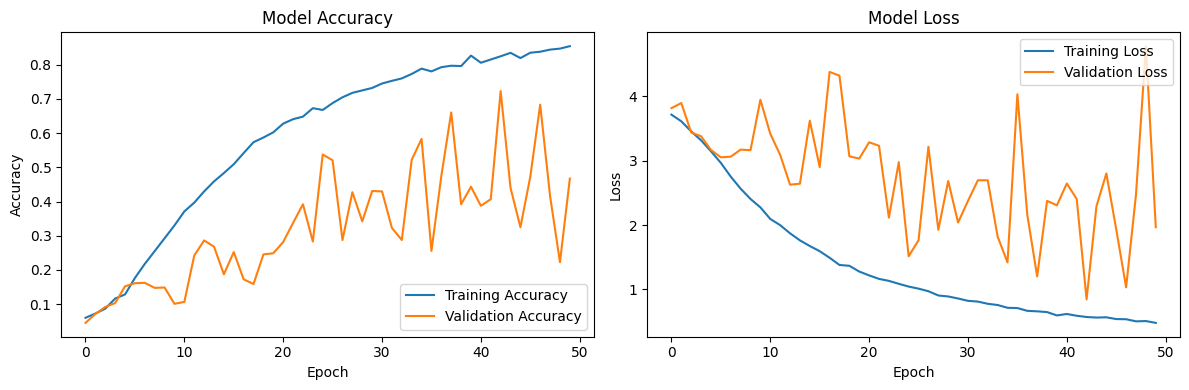

In [46]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v2.history.get('accuracy', [])
test_acc = history_v2.history.get('val_accuracy', [])
loss = history_v2.history.get('loss', [])
test_loss = history_v2.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [48]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.4592 - loss: 1.8867
Loss: 1.8389619588851929
Accuracy: 0.4795454442501068


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step
Precision: 0.6178313643507803
Recall: 0.47954545454545455
F1 Score: 0.45282136883498936
Log Loss: 2.6070319162988063
Accuracy: 0.47954545454545455


              precision    recall  f1-score   support

          ba       0.50      0.39      0.44        23
          ca       0.72      0.62      0.67        21
          da       0.91      0.45      0.61        22
         dha       0.33      0.10      0.15        20
          ga       0.52      0.70      0.59        23
          ha       0.33      0.05      0.09        20
          ja       0.94      0.75      0.83        20
          ka       1.00      0.05      0.09        22
          la       0.45      0.21      0.29        24
          Ma       0.44      0.92      0.60        25
          na       0.50      0.22      0.31        18
         nga       0.67      0.78      0.72        23
         nya       1.00      0.06      0.11        17
          pa       0.30      0.95      0.45        21
          ra       0.83      0.95      0.88        20
          sa       0.84      0.62      0.71        26
          ta       0.17      0.10      0.12        21
         tha       0.92    

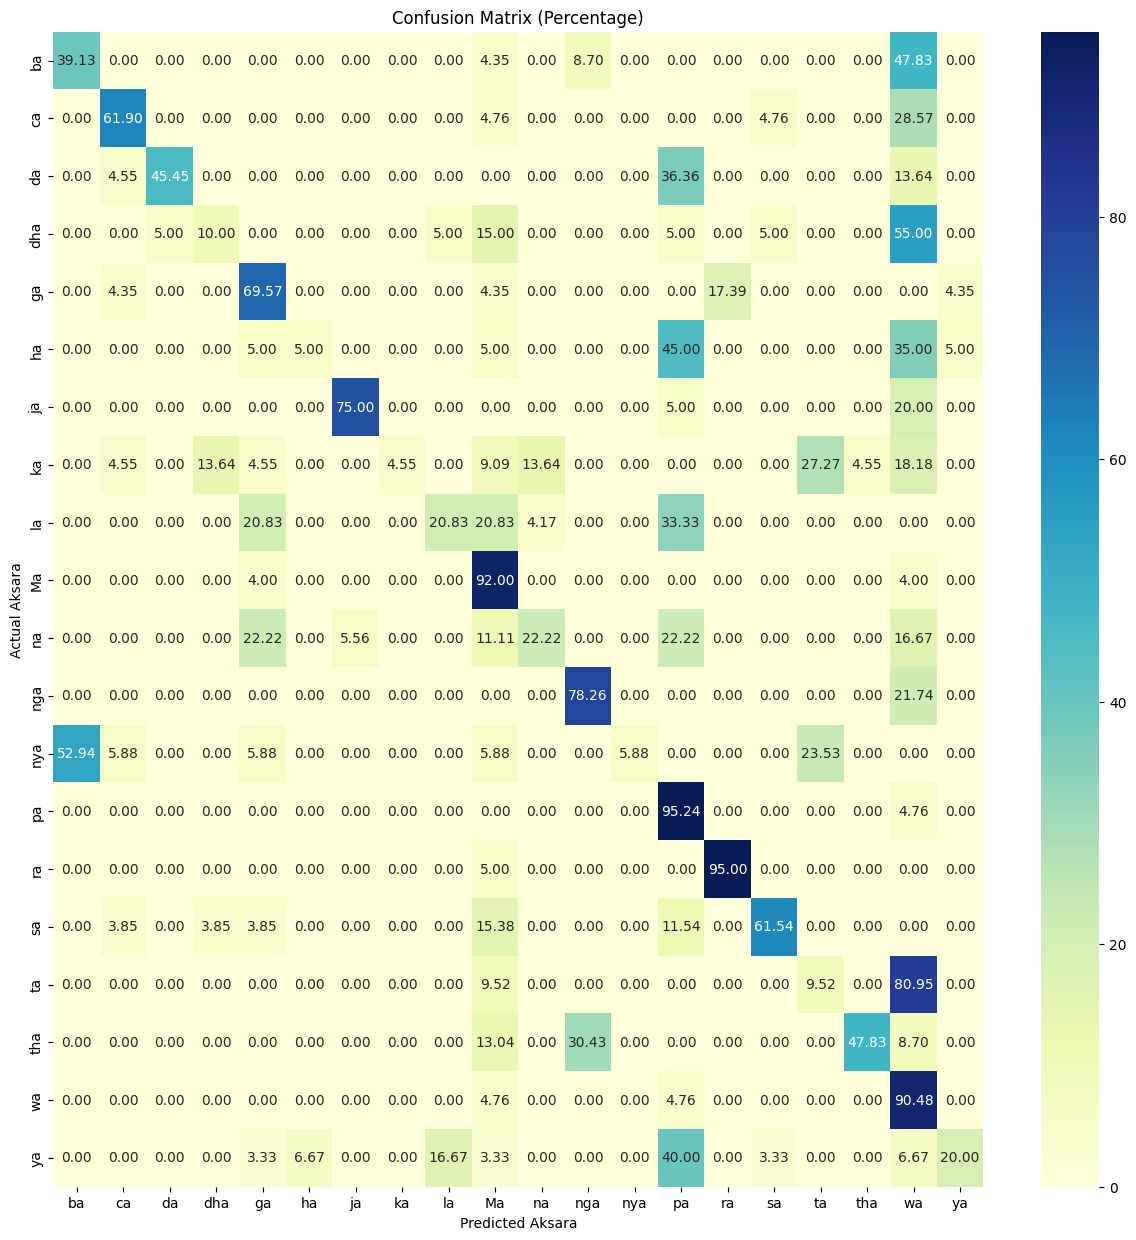

In [50]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()